In [1]:
import os, sys
from glob import glob
import nltk
from nltk.tokenize import word_tokenize
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load model
movie_reviews_model = KeyedVectors.load('../models/movie-reviews-vectors.w2v')

In [3]:
# add dummy entry
data = movie_reviews_model['the']
word_list = list()
for term in ["cute","zany","interesting"]:
    neighbors =  [x[0] for x in movie_reviews_model.most_similar(term,topn=50)]
    for word in neighbors:
        word_list.append(word)
        data = np.vstack((data,movie_reviews_model[word]))

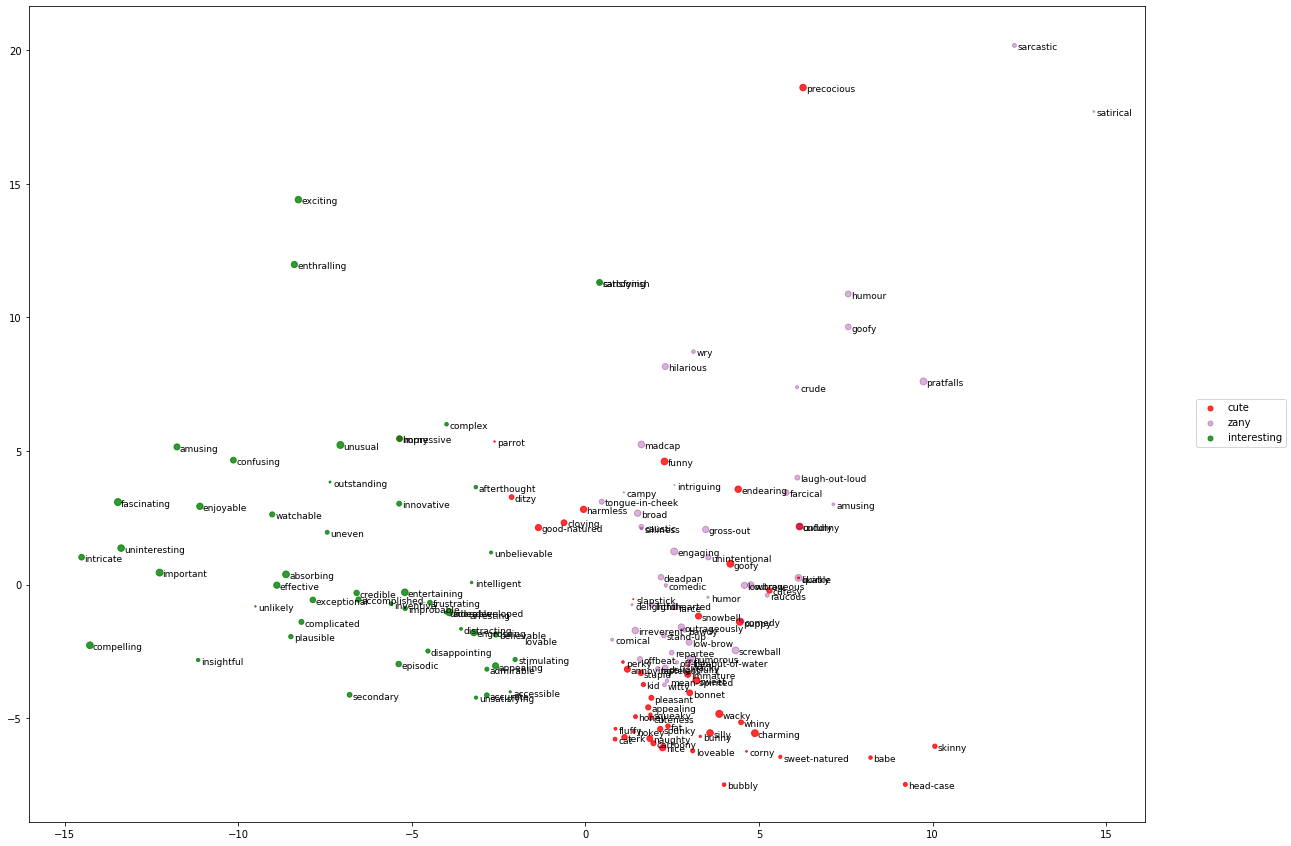

In [4]:
pca = PCA(n_components=2)
plot_data = pca.fit_transform(data)


fig = plt.figure(figsize=(20, 15))
plt.clf()

# plot cute
plt.scatter(plot_data[1:51,0], plot_data[1:51,1], 
            s=sorted([x for x in range(1,len(plot_data[1:51]+1))],reverse=True), 
                                       marker = 'o', c="red",alpha=0.8)

# plot zany
plt.scatter(plot_data[51:101,0], plot_data[51:101,1], 
            s=sorted([x for x in range(1,len(plot_data[51:101]+1))],reverse=True),
            marker = 'o', c="purple",alpha=0.3)

# plot interesting
plt.scatter(plot_data[101:151,0], plot_data[101:151,1], 
            s=sorted([x for x in range(1,len(plot_data[101:151]+1))],reverse=True),
            marker = 'o', c="green",alpha=0.8)
plt.figlegend(["cute","zany","interesting"],loc='right',
              fancybox=True)

for i, w in enumerate(word_list):
    plt.annotate(w, xy = (plot_data[i -1 ,0], plot_data[i -1 ,1]), xytext = (3, 3),size=9,
                 textcoords = 'offset points', ha = 'left', va = 'top')

plt.show()